# SATYASWARUP BANERJEE

## The Sparks Foundation

## Task 1: Prediction using Supervised ML

### Predict the percentage of an student based on the no. of study hours


In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from a RAW link
url = "https://raw.githubusercontent.com/satya-ban01/Datasets_TSF/main/StudentMarksPerHour%20-%20Sheet1.csv"
stud_data = pd.read_csv(url)

In [3]:
stud_data.head(10)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Check if there any null value in the Dataset
stud_data.isnull == True

False

Since we have no NULL values we can go ahead and plot the data.

Plotting the data points on 2-D graph.

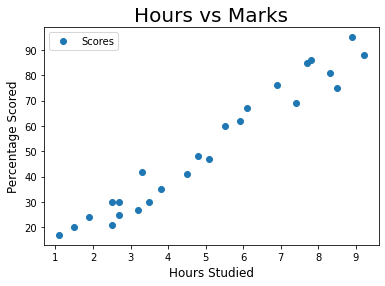

In [5]:

stud_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Marks',size=20)  
plt.xlabel('Hours Studied',size=12)  
plt.ylabel('Percentage Scored',size=12)  
plt.show()

As we can see from the above graph there is a linearity between the No. of hours studies and the marks scored.Lets plot a regression line to confirm the correlation.

### Preparing the data

Dividing the data into "attributes" (inputs) and "labels" (outputs)and splitting this data into training and test sets.
The following code will be used for this :

In [6]:
X = stud_data.iloc[:, :-1].values  
y = stud_data.iloc[:, 1].values  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    random_state=0) 

### Training the Algorithm

Now since we have already done splitting the data its time to train the algorithm with the data.


In [8]:
from sklearn.linear_model import LinearRegression  
regression = LinearRegression()  
regression.fit(X_train, y_train) 

print("Training Successful.")

Training Successful.


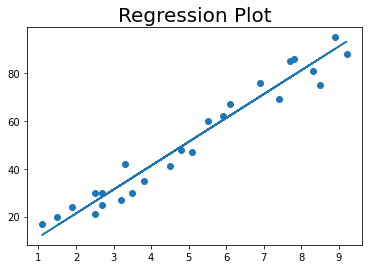

In [9]:
# Plotting the regression line
line = regression.coef_*X+regression.intercept_

# Plotting for the test data
plt.title('Regression Plot',size=20)
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Predictions

Training done successfully now time for predictions.

In [10]:
y_pred = regression.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in y_pred]})
prediction


,Hours,Predicted Marks
0,1.5,16.355920
1,3.2,33.322756
2,7.4,75.240820
3,2.5,26.336412
4,5.9,60.270083
5,3.8,39.311051
6,1.9,20.348117


In [11]:
# Comparing the predicted with the actual marks
df = pd.DataFrame({'Actual_Values': y_test, 'Predicted_Values': y_pred })  
df 

,Actual_Values,Predicted_Values
0,20,16.355920
1,27,33.322756
2,69,75.240820
3,30,26.336412
4,62,60.270083
5,35,39.311051
6,24,20.348117


### Comparing the Actual Marks Plot with the Predicted Marks Plot

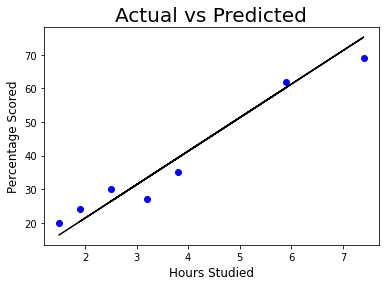

In [12]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Percentage Scored', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### Finally, evaluating the accuracy of the model
This is a step which will calculate on how much the model is accurate.In this the accuracy is calculated using R-Squared method which one of the many metrics used for the calculation of accuracy.

R-squared represents the scatter around the line of best fit.
For example: if the R² is 0.80, then 80% of the variation can be explained by the model’s inputs.

In [13]:
import sklearn
from sklearn.metrics import r2_score
print('Accuracy using R-Squared :', sklearn.metrics.r2_score(y_test, y_pred))

Accuracy using R-Squared : 0.9375614325386811


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [14]:
hours = [9.25]
answer = regression.predict([hours])
print("No. of Hours Studied = {}".format(hours))
print("Percentage Scored = {}".format(round(answer[0],3)))

No. of Hours Studied = [9.25]
Percentage Scored = 93.705
